<a href="https://colab.research.google.com/github/Mina0402/EU_M_Math-Repository/blob/main/Chap07_Ex_01_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set()
%matplotlib inline

%precision 3

'%.3f'

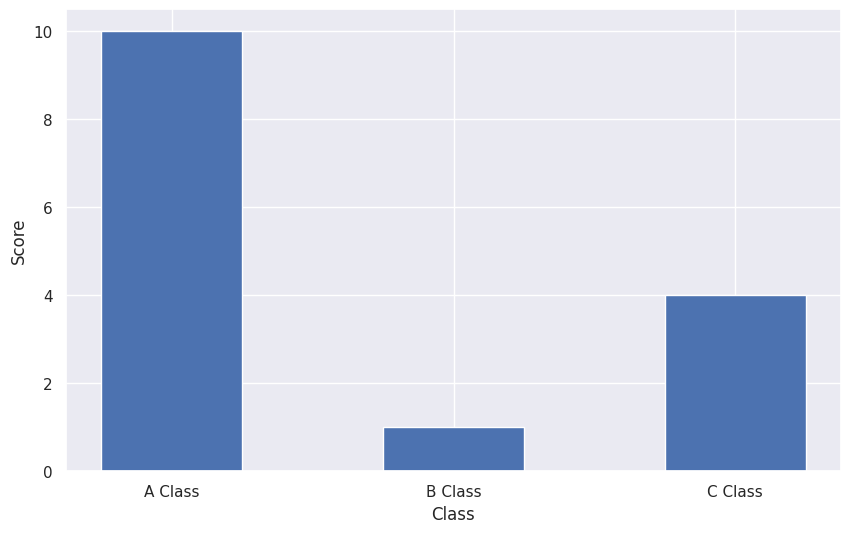

In [ ]:
#棒グラフ
x=[1,2,3]
y=[10,1,4]

plt.figure(figsize=(10,6))

plt.bar(x,y, align='center',width=0.5)

plt.xticks(x,['A Class','B Class','C Class'])

plt.xlabel('Class')
plt.ylabel('Score')

plt.grid(True)

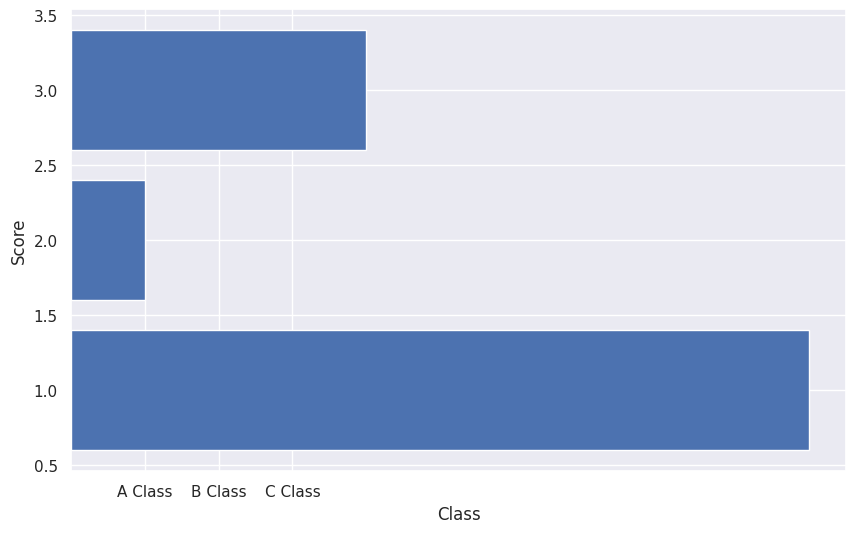

In [ ]:
plt.figure(figsize=(10,6))

plt.barh(x,y, align='center')

plt.xticks(x,['A Class','B Class','C Class'])

plt.xlabel('Class')
plt.ylabel('Score')

plt.grid(True)

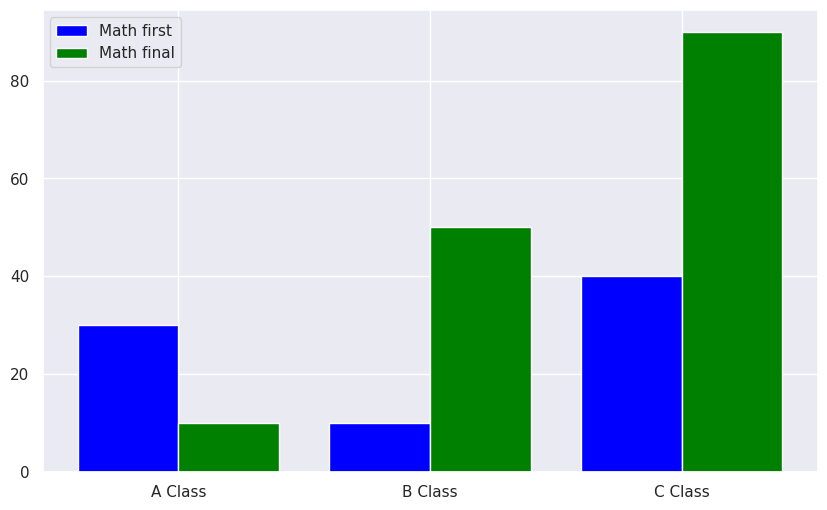

In [ ]:
y1=np.array([30,10,40])
y2=np.array([10,50,90])

x=np.arange(len(y1))

w=0.4

plt.figure(figsize=(10,6))

plt.bar(x,y1,color='blue',width=w,label='Math first',align='center')
plt.bar(x+w,y2,color='green', width=w, label='Math final',align='center')

plt.legend(loc='best')

plt.xticks(x+w/2,['A Class','B Class','C Class'])

plt.grid(True)


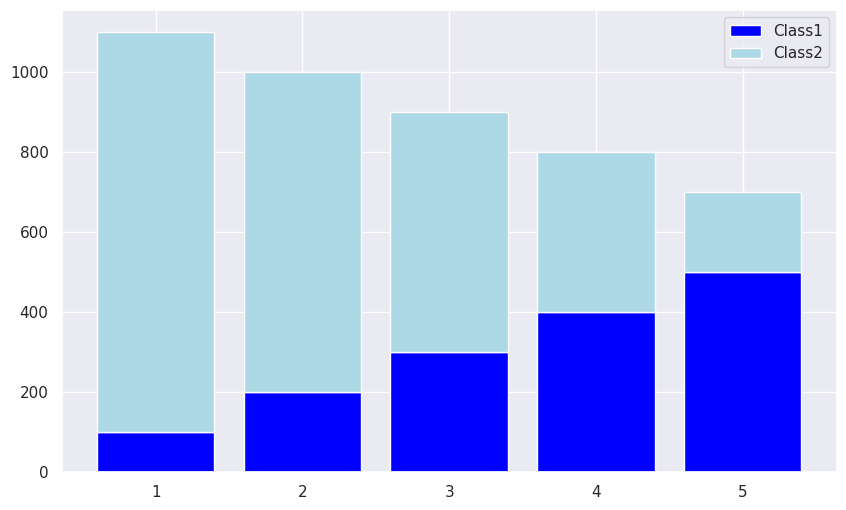

In [ ]:
height1=np.array([100,200,300,400,500])
height2=np.array([1000,800,600,400,200])

x=np.array([1,2,3,4,5])

plt.figure(figsize=(10,6))

p1=plt.bar(x,height1,color='blue')
p2=plt.bar(x,height2,bottom=height1,color='lightblue')

plt.legend((p1[0],p2[0]),('Class1','Class2'))


(-1.1998593997207165,
 1.1047438740833693,
 -1.0999843660947275,
 1.0999992555283205)

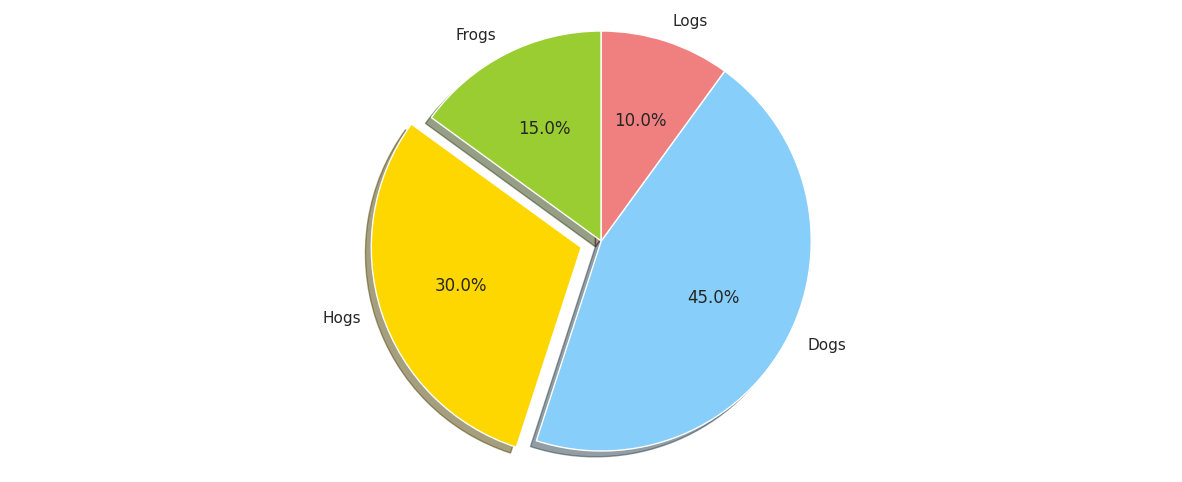

In [ ]:
#円グラフ
labels=['Frogs','Hogs','Dogs','Logs']
sizes=[15,30,45,10]
colors=['yellowgreen','gold','lightskyblue','lightcoral']
explode=(0,0.1,0,0)

plt.figure(figsize=(15,6))

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)

plt.axis('equal')

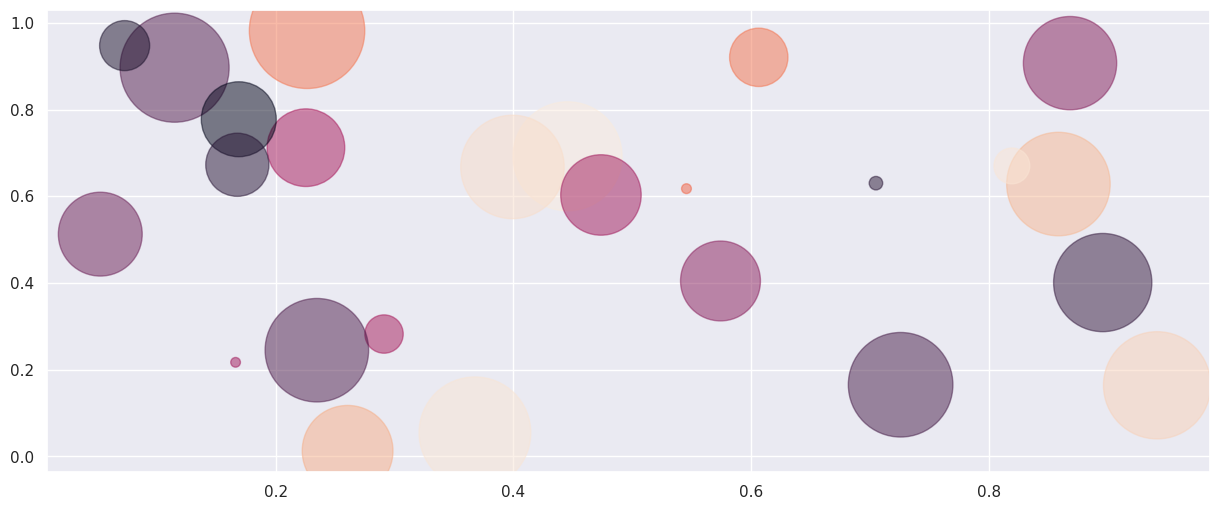

In [ ]:
N=25

x=np.random.rand(N)
y=np.random.rand(N)

colors=np.random.rand(N)

area=10*np.pi*(15*np.random.rand(N))**2

plt.figure(figsize=(15,6))

plt.scatter(x,y,s=area,c=colors,alpha=0.5)

plt.grid(True)

In [ ]:
#練習問題7-1
from sklearn import linear_model

import requests, zipfile
import io
from io import StringIO


url='https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r=requests.get(url, stream=True)

z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
data_math=pd.read_csv('student-mat.csv',sep=';')
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data_math['reason'].value_counts()

reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

(-1.0999975538601565,
 1.0999992958372466,
 -1.2049468518167303,
 1.10499746913413)

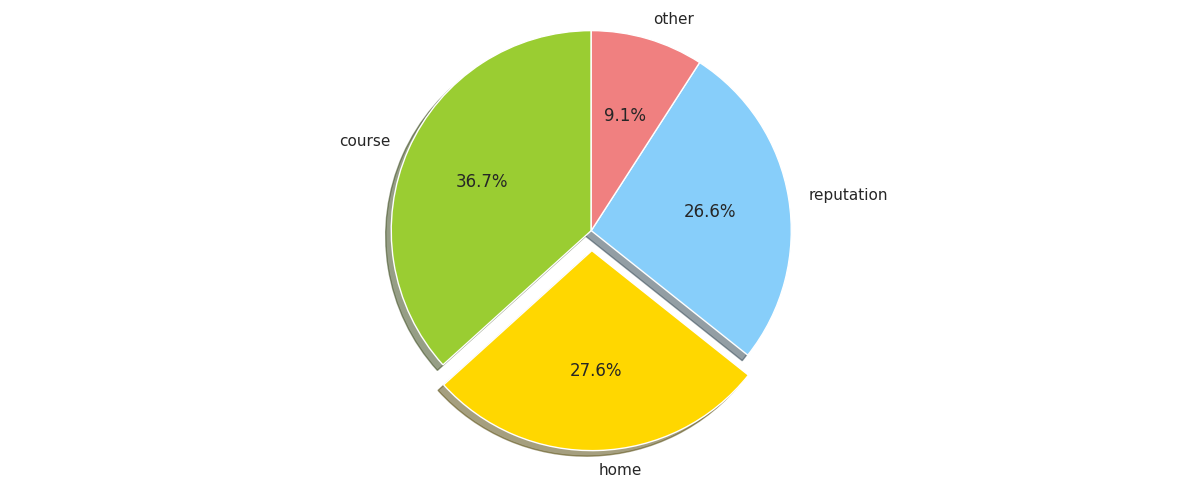

In [ ]:
sum=145+109+105+36
labels=['course','home','reputation','other']
sizes=[(145/sum)*100,(109/sum)*100,(105/sum)*100,(36/sum)*100]
colors=['yellowgreen','gold','lightskyblue','lightcoral']
explode=(0,0.1,0,0)

plt.figure(figsize=(15,6))

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)

plt.axis('equal')

In [ ]:
#練習問題7-2
data_math['higher'].value_counts()

higher
yes    375
no      20
Name: count, dtype: int64

In [ ]:
data_math_higher_G3=data_math.groupby(['higher'],as_index=False)['G3'].mean()
data_math_higher_G3


,higher,G3
0,no,6.800
1,yes,10.608


from matplotlib import pyplot as plt
data_math_higher_G3['G3'].plot(kind='hist', bins=20, title='G3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data_math_higher_G3.groupby('higher').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['G3']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'G3'}, axis=1)
              .sort_values('G3', ascending=True))
  xs = counted['G3']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_math_higher_G3.sort_values('G3', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('higher')):
  _plot_series(series, series_name, i)
  fig.legend(title='higher', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('G3')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data_math_higher_G3['G3'].plot(kind='line', figsize=(8, 4), title='G3')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_math_higher_G3['higher'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_math_higher_G3, x='G3', y='higher', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

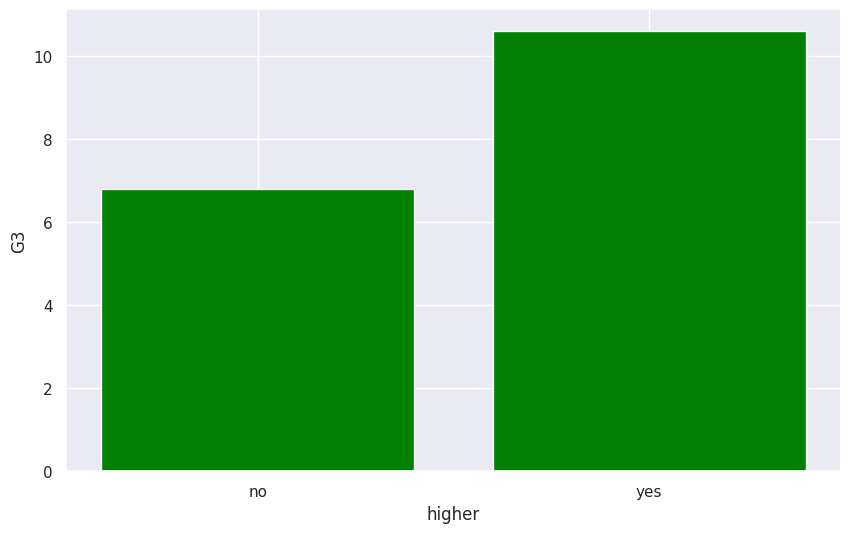

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(data_math_higher_G3['higher'], data_math_higher_G3['G3'], color='green')
plt.xlabel('higher')
plt.ylabel('G3')
plt.show()

In [ ]:
print('yesと答えた方が数学のG3の成績が良い')

yesと答えた方が数学のG3の成績が良い


In [ ]:
#練習問題7-3
data_math['traveltime'].value_counts()

traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64

In [ ]:
data_math_traveltime=data_math.groupby(['traveltime'],as_index=False)['G3'].mean()
data_math_traveltime

,traveltime,G3
0,1,10.782101
1,2,9.906542
2,3,9.260870
3,4,8.750000


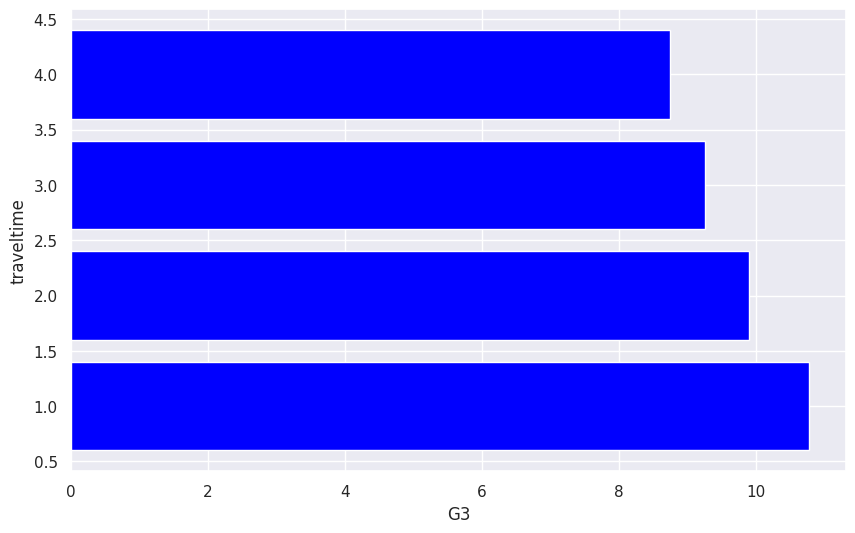

In [ ]:
plt.figure(figsize=(10,6))

plt.barh(data_math_traveltime['traveltime'], data_math_traveltime['G3'], color='blue', align='center')

plt.xlabel('G3')
plt.ylabel('traveltime')

plt.grid(True)

In [ ]:
print('通勤時間が長いほうが、数学のG3の成績が悪くなる')

通勤時間が長いほうが、数学のG3の成績が悪くなる
